In [1]:
from multilayer_dispersion import MagneticFilm, MagneticTensor, Dispersion, μ0, Graphs
import numpy as np

# to reproduce rodolfo's paper, consider

film_0 = MagneticFilm(number_of_layers=10, total_thickness =60e-9)

film_0.magnetic_parameters.define_funct("phi", lambda eta: -np.pi/2)
film_0.magnetic_parameters.define_funct("th", lambda eta: np.pi/2)

dispersion_0 = Dispersion(film_0)

k_vals = np.arange(-100,100, np.pi/3)
w_vals_0, v_vals_0 = dispersion_0.w_vect(k_vals, 1.5e-3/μ0, -np.pi/2, np.pi/2)


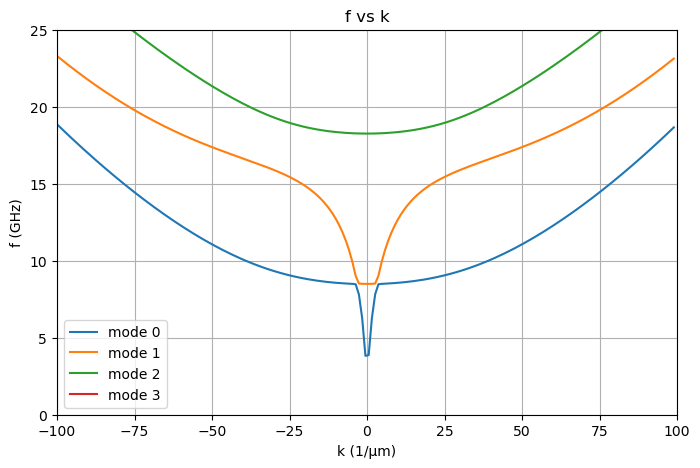

In [2]:
graphs = Graphs()
graphs.dispersion(k_vals, [w_vals_0], modes = [0,1,2,3], xlim=[-100,100], ylim = [0,25])


In [3]:
film_1 = MagneticFilm(number_of_layers=30, total_thickness =60e-9)

film_1.magnetic_parameters.define_funct("phi", lambda eta: -np.pi/2)
film_1.magnetic_parameters.define_funct("th", lambda eta: np.pi/2)

film_1.magnetic_parameters.define_funct("Ms", lambda eta: (800e3/29)*(eta+1/2)+800e3)

dispersion_1 = Dispersion(film_1)

k_vals_1 = np.arange(-30, 30, .33)
w_vals_1, v_vals_1 = dispersion_1.w_vect(k_vals_1, 1.5e-3/μ0,  np.pi/2, - np.pi/2)

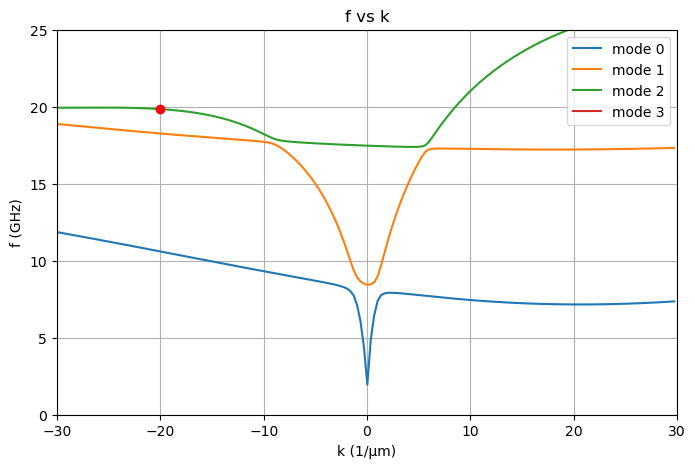

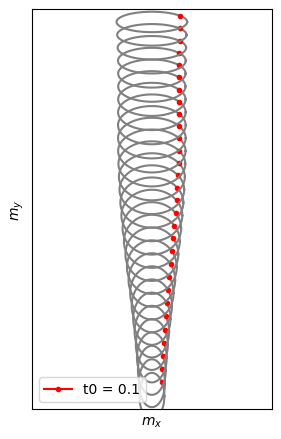

In [4]:
graphs = Graphs()
orbit_parameters = [-20,2]
graphs.dispersion(k_vals_1, [w_vals_1], modes = [0,1,2,3], xlim=[-30,30], ylim = [0,25],  v_k_mode = orbit_parameters)
graphs.orbits(*orbit_parameters,v_vals_1)

In [5]:
f_vals = np.linspace(0,25,120)*1e9
chi=[]
for f in f_vals:
    chi.append(dispersion_1.chi_yy(-20*1e6, 2*np.pi*f, 1.5e-3/μ0, -np.pi/2, np.pi/2))

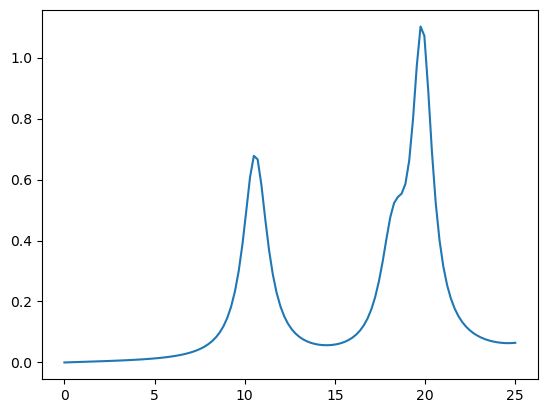

In [6]:
a = np.imag(np.array(chi))
import matplotlib.pyplot as plt

plt.plot(f_vals*1e-9, -a, )
plt.title('')
# plt.xlim(0,2e10)
plt.show()

In [7]:
f_vals = np.linspace(0,25,120)*1e9
chi=[]
for f in f_vals:
    chi.append(dispersion_1.chi_yy(20*1e6, 2*np.pi*f, 1.5e-3/μ0, -np.pi/2, np.pi/2))

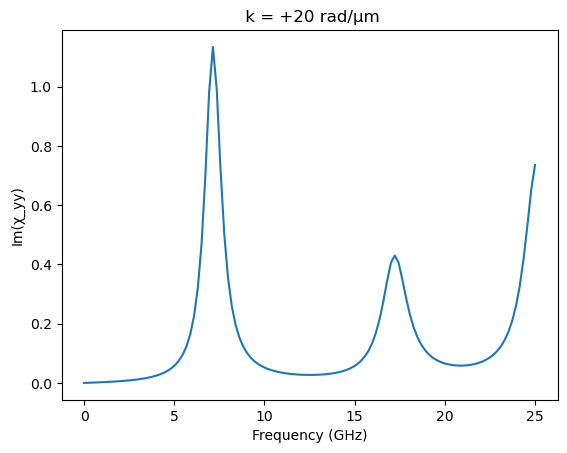

In [8]:
a = np.imag(np.array(chi))
import matplotlib.pyplot as plt

plt.plot(f_vals*1e-9, -a, )
plt.title(' k = +20 rad/μm')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Im(χ_yy)')
# plt.xlim(0,2e10)
plt.show()

In [9]:
k_vals = np.linspace(-30,30,30)*1e6
k_vals

array([-30000000.        , -27931034.48275862, -25862068.96551724,
       -23793103.44827586, -21724137.93103448, -19655172.4137931 ,
       -17586206.89655172, -15517241.37931034, -13448275.86206896,
       -11379310.34482758,  -9310344.82758621,  -7241379.31034483,
        -5172413.79310344,  -3103448.27586207,  -1034482.75862069,
         1034482.75862069,   3103448.27586207,   5172413.79310345,
         7241379.31034483,   9310344.82758621,  11379310.34482759,
        13448275.86206897,  15517241.37931035,  17586206.89655173,
        19655172.41379311,  21724137.93103448,  23793103.44827586,
        25862068.96551725,  27931034.48275863,  30000000.        ])

In [10]:
k_vals = np.linspace(-30,30,30)*1e6
chi=[]
for k in k_vals:
    chi.append(dispersion_1.chi_yy(k, 2*np.pi*20*1e9, 1.5e-3/μ0, -np.pi/2, np.pi/2))

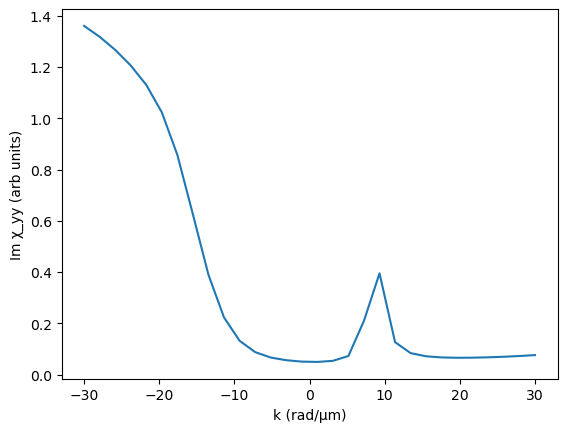

In [11]:
a = np.imag(np.array(chi))
import matplotlib.pyplot as plt

plt.plot(k_vals*1e-6, -a, )
plt.xlabel('k (rad/μm)')
plt.ylabel('Im χ_yy (arb units)')
# plt.xlim(0,2e10)
plt.show()